<a href="https://www.kaggle.com/code/mikhail1681/walmart-weekly-revenue-prediction?scriptVersionId=166586431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Walmart Weekly Revenue Prediction

# Прогноз еженедельного дохода Walmart


___________________________________________________________________________________________________________________________

This project is based on the ['Walmart Sales'](https://www.kaggle.com/datasets/mikhail1681/walmart-sales) dataset. I took the dataset from the Kaggle platform.

Этот проект сделан на базе датасета ['Walmart Sales'](https://www.kaggle.com/datasets/mikhail1681/walmart-sales). Датасет взят мною с платформы Kaggle.

___________________________________________________________________________________________________________________________

The goal of the project was to analyze the available data and build a model that could predict weekly sales with high accuracy.

Цель проекта проанализировать доступные данные и построить модель, которая могла бы с высокой точностью прогнозировать еженедельные продажи.

____________________________________________________________________________________________________________________________

Steps:

1. Data preparation and research.
2. Visualizations.
3. Dividing the data into training and test sets.
4. Feature scaling.
5. Application of the random forest method.
6. Model evaluation.
7. Conclusion.

Шаги:

1. Подготовка данных и исследование.
2. Визуализация.
3. Разделение данных на обучающий и тестовый наборы.
4. Масштабирование параметров.
5. Применение метода случайного леса.
6. Оценка модели.
7. Заключение.

____________________________________________________________________________________________________________________________

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales/Walmart_sales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data preparation and research./Подготовка данных и исследование.

In [3]:
data = pd.read_csv("/kaggle/input/walmart-sales/Walmart_sales.csv")

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# Convert temperature to degrees Celsius (℃)
# Конвертируем температуру воздуха в грудусы Цельсия (℃)

data.Temperature = round((data.Temperature-32)/1.8, 2)

In [8]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There are no missing values.

In [9]:
data = data.drop('Date', axis=1)

# 2. Visualizations./Визуализация.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


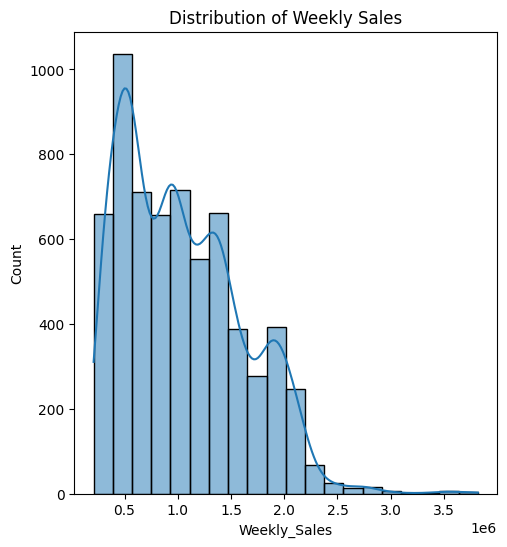

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales');

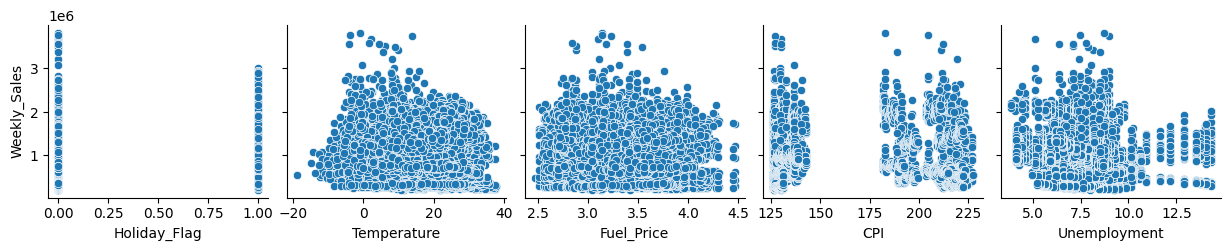

In [11]:
sns.pairplot(data, x_vars=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
             y_vars=['Weekly_Sales'], kind='scatter')

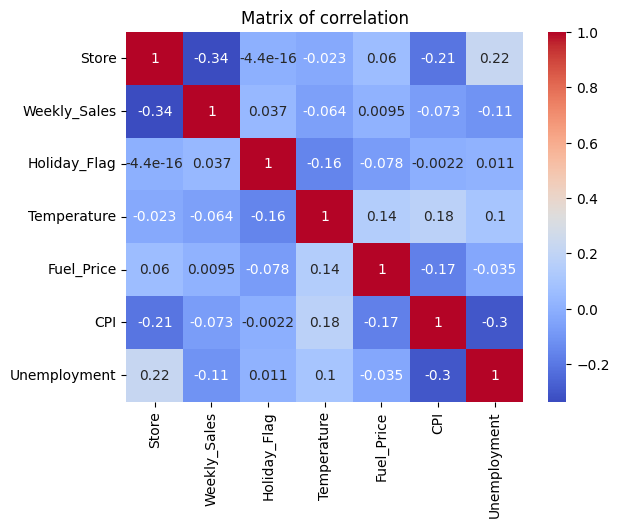

In [12]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix of correlation');

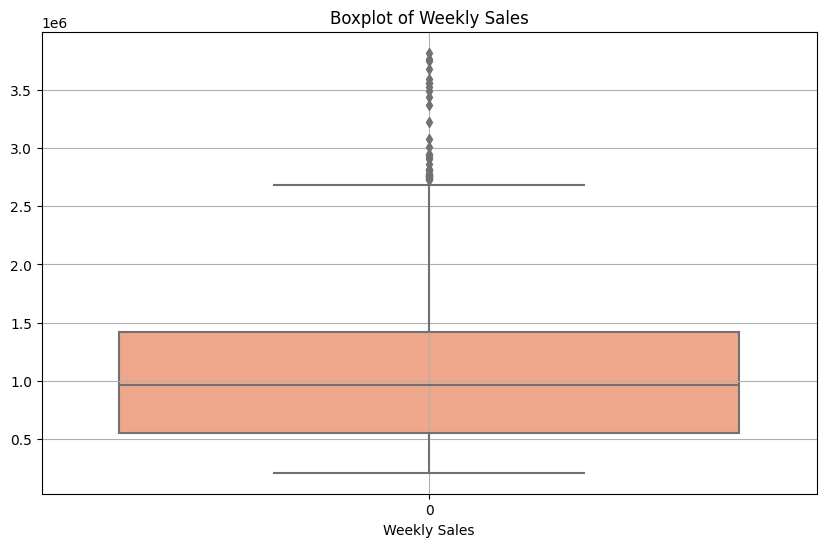

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['Weekly_Sales'], color='lightsalmon')
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.grid(True)

In the 'Boxplot of Weekly Sales' chart we see the presence of outliers. It is necessary to clear our data from them.

На диаграмме 'Boxplot of Weekly Sales' мы видим наличие выбросов. Необходимо очистить от них наши данные.

In [14]:
'''We find the boundaries of emissions. We calculate quartiles (Q1 and Q3) and interquartile range (IQR) 
for the "Weekly_Sales" column".'''

'''Находим границы выбросов. Рассчитываем квартили (Q1 и Q3) и межквартильный размах (IQR)
для столбца "Weekly_Sales" column".'''

Q1 = data['Weekly_Sales'].quantile(0.25) # 25th quartile
Q3 = data['Weekly_Sales'].quantile(0.75) # 75th quartile

IQR = Q3 - Q1      # Interquartile range

lower_bound = Q1 - 1.5 * IQR  # Lower emission limit
upper_bound = Q3 + 1.5 * IQR  # Upper emission limit


In [15]:
'''Next, we filter the source data, leaving only those rows where the values of the "Weekly_Sales" column 
are within certain outlier boundaries.'''

'''Далее фильтруем исходные данные, оставляя только те строки, где значения столбца «Weekly_Sales»
находятся в определенных границах выбросов.'''

cleaned_data = data[(data['Weekly_Sales'] >= lower_bound) & (data['Weekly_Sales'] <= upper_bound)]

# 3. Dividing the data into training and test sets./Разделение данных на обучающие и тестовые наборы.

In [16]:
X_cleaned = cleaned_data.drop('Weekly_Sales', axis=1)
y_cleaned = cleaned_data['Weekly_Sales']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, 
                                                                                    test_size=0.1, random_state=101)

# 4. Feature scaling./Масштабирование параметров.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler_cleaned = StandardScaler()
X_train_scaled_cleaned = scaler_cleaned.fit_transform(X_train_cleaned)
X_test_scaled_cleaned = scaler_cleaned.transform(X_test_cleaned)

# 5. Application of the random forest method./Применение метода случайного леса.

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
forest_model_cleaned = RandomForestRegressor(random_state=101)

In [23]:
forest_model_cleaned.fit(X_train_scaled_cleaned, y_train_cleaned)

RandomForestRegressor(random_state=101)

In [24]:
y_pred_cleaned = forest_model_cleaned.predict(X_test_scaled_cleaned)

# 6. Model evaluation./Оценка модели.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
MAE = mean_absolute_error(y_test_cleaned, y_pred_cleaned)

In [27]:
RMSE = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))

In [28]:
print(MAE)
print(RMSE)
np.mean(data['Weekly_Sales'])

67383.76120249611
117436.66137498885


1046964.8775617715

In [29]:
RMSE*100/np.mean(data['Weekly_Sales'])

11.216867336417407

# 7. Conclusion./Заключение.

After the work done, the following conclusions can be drawn:

1. We created and trained a model capable of predicting the weekly revenue of the famous chain retailer Walmart.

2. Removing outliers from the data resulted in improved model performance. The mean absolute error (MAE) and root mean square error (RMSE) decreased after data cleaning, indicating a better fit of the predicted values to the actual data.

3. The trained RandomForestRegressor model showed good results on the cleaned data. Evaluation of the model on the test set showed low error values, indicating its ability to make accurate predictions.

4. The error percentage after removing outliers was about 11.21% of the average weekly sales.

По итогам проделанной работы можно сделать следующие выводы:

1. Мы создали и обучили модель, способную прогнозировать еженедельную выручку известного сетевого ритейлера Walmart.

2. Удаление выбросов из данных привело к повышению производительности модели. Средняя абсолютная ошибка (MAE) и среднеквадратическая ошибка (RMSE) уменьшились после очистки данных, что указывает на лучшее соответствие прогнозируемых значений фактическим данным.

3. Обученная модель RandomForestRegressor показала хорошие результаты на очищенных данных. Оценка модели на тестовом наборе показала низкие значения ошибок, что указывает на ее способность делать точные прогнозы.

4. Процент ошибок после удаления выбросов составил около 11,21% от среднего недельного объема продаж.